In [1]:
from google.colab import files
uploaded = files.upload()

Saving final_data.csv to final_data.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import sklearn
from sklearn.utils import shuffle
# from sklearn.model_selection import train_test_split

%matplotlib inline

df = pd.read_csv('final_data.csv')
df = df.drop(columns=['File Name','Sr'])
df = shuffle(df)
df



,Temperature,Series,Parallel,Shading,Number of cells,Voltage (V),Current (I),I/V,Solar Panel,Cell Number,Shade Percentage,IsShade
82375,45,5,2,2,10,0.56,6.52,11.64,8746,6,20.0,0
81571,45,5,2,0,10,1.52,8.68,5.71,8666,2,0.0,0
21962,30,10,1,7,10,2.43,2.18,0.90,2298,3,70.0,1
65334,40,5,2,1,10,2.35,6.14,2.61,6941,5,10.0,0
56509,40,10,1,8,10,2.30,2.17,0.94,5957,10,80.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6251,27,10,1,9,10,2.52,2.17,0.86,626,2,90.0,1
83586,45,5,2,6,10,0.67,4.35,6.49,8867,7,60.0,0
98525,50,5,2,0,10,2.46,5.22,2.12,10462,6,0.0,0
81916,45,5,2,10,10,1.97,4.28,2.17,8700,7,100.0,1


In [ ]:
df = df.drop(columns=['File Name','Sr'])
df

,Temperature,Series,Parallel,Shading,Number of cells,Voltage (V),Current (I),I/V,Solar Panel,Cell Number,Shade Percentage,IsShade
18830,30,10,1,2,10,1.11,2.19,1.97,1985,1,20.0,1
14152,27,5,2,10,10,2.33,4.16,1.79,1517,3,100.0,1
33260,30,5,2,7,10,2.01,4.34,2.16,3532,1,70.0,1
58612,40,2,4,3,8,1.13,-20.87,-18.47,6180,1,37.5,1
83032,45,5,2,4,10,1.13,6.52,5.77,8812,3,40.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
56878,40,10,1,8,10,5.99,-17.28,-2.88,5994,9,80.0,0
71553,45,10,1,5,10,1.54,2.18,1.42,7563,4,50.0,1
20451,30,10,1,4,10,5.32,1.60,0.30,2147,2,40.0,1
4082,27,10,1,5,10,4.83,2.17,0.45,409,3,50.0,1


In [3]:
X = df.drop('IsShade', axis=1)
y = df['IsShade']


In [4]:

from sklearn.model_selection import train_test_split
# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state=66)



In [5]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
# random forest model creation
rfc = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)


In [6]:
print('Train set')
train_pred = rfc.predict_proba(X_train)
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, train_pred[:,1])))
print('Test set')
test_pred = rfc.predict_proba(X_test)
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, test_pred[:,1])))

Train set
Random Forests roc-auc: 0.9912600505498427
Test set
Random Forests roc-auc: 0.9910511777469092


In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')

In [8]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[16262  1098]
 [  678 16500]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     17360
           1       0.94      0.96      0.95     17178

    accuracy                           0.95     34538
   macro avg       0.95      0.95      0.95     34538
weighted avg       0.95      0.95      0.95     34538



=== All AUC Scores ===
[0.99057777 0.9894404  0.98951258 0.98974687 0.99061917 0.99120093
 0.98947362 0.99029711 0.99097764 0.98976645]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.9901612541255072


In [9]:
from sklearn.metrics import accuracy_score

print("Train Accuracy :: ", accuracy_score(y_train, rfc.predict(X_train)))
print("Test Accuracy  :: ", accuracy_score(y_test, rfc_predict))

Train Accuracy ::  0.9497330031920289
Test Accuracy  ::  0.9485783774393421


In [10]:
from sklearn.model_selection import KFold
scores_rf = []
kfold = KFold(n_splits=10)
kfold

KFold(n_splits=10, random_state=None, shuffle=False)

In [ ]:
rfc_predict

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

In [ ]:

for train_index, test_index in kfold.split(y_test):

    X_train, X_test = y_test[train_index], y_test[test_index]
    y_train, y_test = y[train_index], y[test_index]

    rfc.fit(X_train, y_train)
    conf_matrix = confusion_matrix(y_test, rfc.predict(X_test))
    conf_matrix_list_of_arrays.append(conf_matrix)

In [ ]:
for train_index,test_index in kfold.split(y_test):
    print("Train",train_index)
    print(test_index)
    X_train, X_test = y_test[train_index], y_test[test_index]
    print(X_test.length)
    #print(confusion_matrix(y_test, rfc_predict))
    

Train [ 3454  3455  3456 ... 34535 34536 34537]
[   0    1    2 ... 3451 3452 3453]


AttributeError: 'Series' object has no attribute 'length'

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(rfc, X_train,X_test, cv=10)
#conf_mat = confusion_matrix(y_test, y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [67042, 34538]

In [11]:
from sklearn.model_selection import KFold
scores_rf = []
kfold = KFold(n_splits=10)
print("Cross-validation scores:\n{}".format(
      scores_rf.append(cross_val_score(rfc, X, y, cv=kfold))))
print("Cross-validation scores:\n{}".format(
      cross_val_score(rfc, X, y, cv=kfold)))
print(np.mean(scores_rf))

Cross-validation scores:
None
Cross-validation scores:
[0.95166371 0.94802126 0.94792282 0.95126994 0.95442016 0.95668439
 0.95038393 0.95461705 0.95451861 0.94959638]
0.9519098247686552


In [ ]:
# Checking with 10cv Confusion matrix

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
scores_rf = []
kfold = KFold(n_splits=10)
print("Cross-validation scores:\n{}".format(
      cross_validate(rfc, X, y, cv=kfold)))
# print("Cross-validation scores:\n{}".format(
#       cross_val_score(rfc, X, y, cv=kfold)))
# print(np.mean(scores_rf))

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
scores_rf = []
kfold = KFold(n_splits=10)

print("Cross-validation scores:\n{}".format(
      confusion_matrix(y_test, rfc.predict(X_test))))
# print("Cross-validation scores:\n{}".format(
#       cross_val_score(rfc, X, y, cv=kfold)))
# print(np.mean(scores_rf))

Cross-validation scores:
[[16403   968]
 [  579 16588]]


In [ ]:
# from sklearn import cross_validation
from sklearn.model_selection import cross_validate
kfold = KFold(n_splits=10)

conf_matrix_list_of_arrays = []
kf = cross_validate(rfc, X, y, cv=kfold)
#print(kf)
# for train_index, test_index in kf:

#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]

#     rfc.fit(X_train, y_train)
#     conf_matrix = confusion_matrix(y_test, rfc.predict(X_test))
#     conf_matrix_list_of_arrays.append(conf_matrix)

NameError: name 'pritn' is not defined

In [ ]:
print(kf)

{'fit_time': array([20.0713768 , 20.26028275, 20.19766164, 20.4031322 , 20.01850939,
       18.46903777, 20.98485875, 20.50808454, 20.52984595, 20.38018608]), 'score_time': array([0.34412742, 0.34330082, 0.33106828, 0.37715316, 0.35055542,
       0.35080338, 0.36170435, 0.32365084, 0.29633021, 0.35496211]), 'test_score': array([0.93985036, 0.94250837, 0.94309904, 0.93935814, 0.93542036,
       0.93364836, 0.94201614, 0.93857058, 0.94290215, 0.94349281])}


In [ ]:
for train_index, test_index in kf:

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    rfc.fit(X_train, y_train)
    conf_matrix = confusion_matrix(y_test, rfc.predict(X_test))
    conf_matrix_list_of_arrays.append(conf_matrix)

ValueError: too many values to unpack (expected 2)

In [ ]:
mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0)

In [ ]:
from sklearn.model_selection import StratifiedKFold
scores_rf = []
skfold = StratifiedKFold(n_splits=10)
print("Cross-validation scores:\n{}".format(
      scores_rf.append(cross_val_score(rfc, X, y, cv=kfold))))
print("Cross-validation scores:\n{}".format(
      cross_val_score(rfc, X, y, cv=skfold)))
print("10 fold (StratiedFold): ",np.mean(scores_rf))

Cross-validation scores:
None
Cross-validation scores:
[0.93670637 0.94339994 0.94123437 0.94084063 0.94250837 0.93473125
 0.9399429  0.93442946 0.94082898 0.93718618]
10 fold (StratiedFold):  0.9403228982083087


In [ ]:
#from sklearn import cross_validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
kf = KFold(n_splits=10)

conf_matrix_list_of_arrays = []
kf = cross_validate(rfc, X, y, cv=kfold)
# print(kf)
for train_index, test_index in kf(X,y):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    rfc.fit(X_train, y_train)
    conf_matrix = confusion_matrix(y_test, rfc.predict(X_test))
    conf_matrix_list_of_arrays.append(conf_matrix)

TypeError: 'dict' object is not callable

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(rfc, X_train, y_train, cv=10)
conf_mat = confusion_matrix(y, y_pred)
print(conf_mat)

ValueError: Found input variables with inconsistent numbers of samples: [101580, 67042]

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold



skf = StratifiedKFold(n_splits=10)
cv_iter = skf.split(X, y)
cms = []
#  cms=np.empty((n_classes, n_classes))

for train, test in cv_iter:
    rfc.fit(X[train,], y[train])
    cm = confusion_matrix(y[test], rfc.predict(X[test]), labels=rfc.classes_)
#         cms.append(cm)
    cms += cm
#     print(np.mean(np.array(cms), axis=1)

TypeError: '(array([ 10002,  10005,  10008, ..., 101577, 101578, 101579]),)' is an invalid key

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cf_matrix = confusion_matrix(y_test, rfc_predict)
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

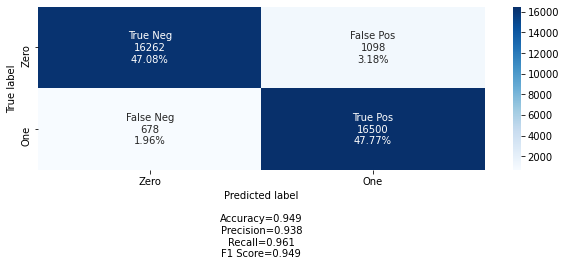

In [13]:
#plt.figure(figsize=(16,9))
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      figsize=(10,3),
                      cmap='Blues')